In [30]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##**<font color = 'pink'>Modelo de Decisão para Risco de Crédito**

Calculando entropia de duas classes

In [31]:
%%R
-0.60 * log2(0.60) - 0.40 * log2(0.40)

[1] 0.9709506


Gerando a curva de Entropia

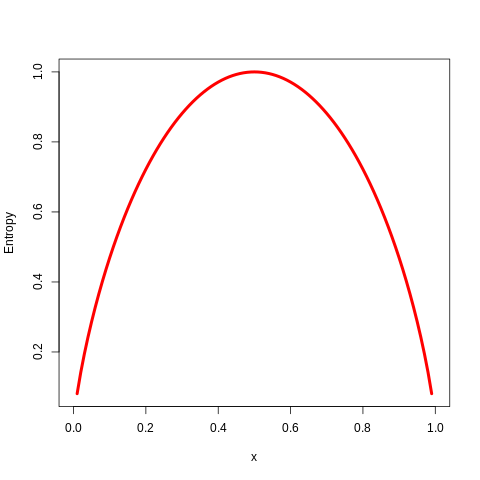

In [32]:
%%R
curve(-x * log2(x) - (1 - x) * log2(1 - x), col = "red", xlab = "x", ylab = "Entropy", lwd = 4)

Identificando o risco de crédito

In [36]:
%%R
credit <- read.csv("credito.csv")
str(credit)
#View(credit)

#default variável target

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : Factor w/ 4 levels "< 0 DM","> 200 DM",..: 1 3 4 1 1 4 4 3 4 3 ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 1 2 4 2 2 2 2 1 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 5 5 4 5 2 4 5 2 5 2 ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : Factor w/ 5 levels "< 100 DM","> 1000 DM",..: 5 1 1 1 1 5 4 1 2 1 ...
 $ employment_duration : Factor w/ 5 levels "< 1 year","> 7 years",..: 2 3 4 4 3 3 2 3 4 5 ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 1 1 1 2 3 2 2 ...
 $ exi

Verificando 2 atributos do cliente - Table de fatores

- Conta corrente

In [38]:
%%R
# proporção de saldo da conta corrente
table(credit$checking_balance)


    < 0 DM   > 200 DM 1 - 200 DM    unknown 
       274         63        269        394 


- Conta poupança

In [40]:
%%R
# proporção saldo poupança
table(credit$savings_balance)


     < 100 DM     > 1000 DM  100 - 500 DM 500 - 1000 DM       unknown 
          603            48           103            63           183 


Verificando as características do Crédito

In [41]:
%%R
summary(credit$months_loan_duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    18.0    20.9    24.0    72.0 


In [42]:
%%R
summary(credit$amount)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18424 


Variável target

In [43]:
%%R
table(credit$default)


 no yes 
700 300 


Usando sample para constuir os dados de Treino e Teste

In [47]:
%%R
set.seed(123)
train_sample <- sample(1000, 900)

<font color='red'>Split dos dataframes

In [48]:
%%R
credit_train <- credit[train_sample, ]

In [49]:
%%R
credit_test  <- credit[-train_sample, ]

Verificando a proporção da variável target nos datasets

In [50]:
%%R
prop.table(table(credit_train$default))


       no       yes 
0.7055556 0.2944444 


In [51]:
%%R
prop.table(table(credit_test$default))


  no  yes 
0.65 0.35 


<font color='green'>Construindo um modelo

In [52]:
%%R
install.packages("C50")
library(C50)
?C5.0

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘partykit’, ‘Cubist’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/libcoin_1.0-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 779010 bytes (760 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

File: /tmp/RtmpTZu7UH/Rtxt7669580693
C5.0.default                package:C50                R Documentation



_C_5._0 _D_e_c_i_s_i_o_n _T_r_e_e_s _a_n_d _R_u_l_e-_B_a_s_e_d _M_o_d_e_l_s



_D_e_s_c_r_i_p_t_i_o_n:



     Fit classification tree models or rule-based models using

     Quinlan's C5.0 algorithm



_U_s_a_g_e:



     ## Default S3 method:

     C5.0(

       x,

       y,

       trials = 1,

       rules = FALSE,

       weights = NULL,

       control = C5.0Control(),

       costs = NULL,

       ...

     )

     

     ## S3 method for class 'formula'

     C5.0(formula, data, weights, subset, na.action = na.pass, ...)

     

_A_r_g_u_m_e_n_t_s:



       x: a data frame or matrix of predictors.



       y: a factor vector with 2 or more levels



  trials: an integer specifying the number of boosting iterations. A

          value of one indicates that a single model is used.



   rules: A logical: shoul

Criando a visualizando o modelo C5

In [53]:
%%R
# 900 amostras como entrada em credit_train 
# Usou 16 preditores
#criou uma árvore de tamanho 69 nós (pontos de decisão)
credit_model <- C5.0(credit_train[-17], credit_train$default)
credit_model


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Tree size: 69 

Non-standard options: attempt to group attributes



Informações detalhadas sobre a árvore

In [54]:
%%R
summary(credit_model)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)


C5.0 [Release 2.07 GPL Edition]  	Fri Jul 10 14:12:16 2020
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/54)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}:
    :...housing = rent: yes (16/1)
    :   housing = other:
    :   :...employment_duration in {> 7 years,1 - 4 years,
    :   :   :                       4 - 7 years}: yes (10)
    :   :   employment_duration in {< 1 year,unemployed}:
    :   :   :...job in {management,unemployed,unskilled}: no (3)
    :   :       job = skilled: yes (1)
    :   housing = own:
    :   :...purpose in {business,education}: no (9/2)
    :       purpose in {car0,renovations}: yes (3)
    :       purpose = car:
    :       :...months_loan_duration <= 18: yes (5)
    :       :   months_loan_duration > 18:
   

Avaliando a performance do modelo

- predict


In [57]:
%%R
credit_pred <- predict(credit_model, # modelo como parâmetro
                       credit_test)  # novos dados de teste

Confusion Matrix para comparar valores observados e valores previstos

In [ ]:
%%R
install.packages("gmodels")
library(gmodels)

Criando a Confusion Matrix

In [58]:
%%R
?CrossTable
CrossTable(credit_test$default, # dados observados/históricos/que já estão nos dados de teste
           credit_pred,         
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('Observado', 'Previsto')) # labels da matriz


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Previsto 
   Observado |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |        55 |        10 |        65 | 
             |     0.550 |     0.100 |           | 
-------------|-----------|-----------|-----------|
         yes |        20 |        15 |        35 | 
             |     0.200 |     0.150 |           | 
-------------|-----------|-----------|-----------|
Column Total |        75 |        25 |       100 | 
-------------|-----------|-----------|-----------|

 


Melhorando a performance do modelo

- Aumentando a precisão com 10 tentativas

In [59]:
%%R
credit_boost10 <- C5.0(credit_train[-17], credit_train$default, trials = 10)
credit_boost10


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Number of boosting iterations: 10 
Average tree size: 56.6 

Non-standard options: attempt to group attributes



In [60]:
%%R
summary(credit_boost10)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Fri Jul 10 14:21:01 2020
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/54)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}:
    :...housing = rent: yes (16/1)
    :   housing = other:
    :   :...employment_duration in {> 7 years,1 - 4 years,
    :   :   :                       4 - 7 years}: yes (10)
    :   :   employment_duration in {< 1 year,unemployed}:
    :   :   :...job in {management,unemployed,unskilled}: no (3)
    :   :       job = skilled: yes (1)
    :   housing = own:
    :   :...purpose in {business,education}: no (9/2)
    :       purpose in {car0,renovations}: yes (3)
    :       purpose = car:
    :       :...months_loan_duration <= 18: yes (5)
    :    

Score do modelo

In [61]:
%%R
credit_boost_pred10 <- predict(credit_boost10, credit_test)

Confusion Matrix

In [ ]:
%%R
CrossTable(credit_test$default, 
           credit_boost_pred10,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('Observado', 'Previsto'))

<font color = 'red'>**Dando pesos aos erros**

- Criando uma matriz de dimensões de custo

In [62]:
%%R
matrix_dimensions <- list(c("no", "yes"), c("no", "yes"))
names(matrix_dimensions) <- c("Previsto", "Observado")
matrix_dimensions

$Previsto
[1] "no"  "yes"

$Observado
[1] "no"  "yes"



- Construindo a Matriz

In [63]:
%%R
error_cost <- matrix(c(0, 1, 4, 0), nrow = 2, dimnames = matrix_dimensions)
error_cost

        Observado
Previsto no yes
     no   0   4
     yes  1   0


- Aplicando a Matriz à árvore

In [67]:
%%R
?C5.0
credit_cost <- C5.0(credit_train[-17], credit_train$default, costs = error_cost)

- Score do Modelo

In [68]:
%%R
credit_cost_pred <- predict(credit_cost, credit_test)

- Confusion Matrix

In [69]:
%%R
# Confusion Matrix
CrossTable(credit_test$default, 
           credit_cost_pred,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('Observado', 'Previsto'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Previsto 
   Observado |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |        39 |        26 |        65 | 
             |     0.390 |     0.260 |           | 
-------------|-----------|-----------|-----------|
         yes |         7 |        28 |        35 | 
             |     0.070 |     0.280 |           | 
-------------|-----------|-----------|-----------|
Column Total |        46 |        54 |       100 | 
-------------|-----------|-----------|-----------|

 
